# Introduction

This Exploratory Data Analysis (EDA) focuses on Spotify's top hits, with the goal of quantifying the elements that contribute to a hit song. As part of the content analysis team, our objective this quarter is to dive deep into Spotify's top tracks and uncover the characteristics that define popular music. Our product manager has outlined a comprehensive list of questions that need to be addressed—over 20 in total—requiring an extensive examination of the data. While the task initially seemed daunting, a fortunate development came our way: an experienced data scientist on our team recently compiled data on the top 50 tracks for a machine learning project and agreed to share it. This dataset will prove invaluable, especially as navigating the data warehouse and writing complex SQL queries is still a developing skill for some team members. With this data, we're confident we can thoroughly answer our product manager’s questions—and perhaps even uncover additional insights she hadn’t considered.

## Goal
The gaol of this analysis is to determine factors that influence music popularity.

# 1. Load the data using Pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('spotifytoptracks.csv', index_col=0)
data.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usage: 6.

# 2. Perform data cleaning
***
### Handling missing values

In [4]:
data.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

From the look of things, there are no missing values in our data.
**Next,**

### Removing duplicate samples and features

In [5]:
data.duplicated().sum()

0

There are no duplicated rows either. **Next,**

### Treating the outliers

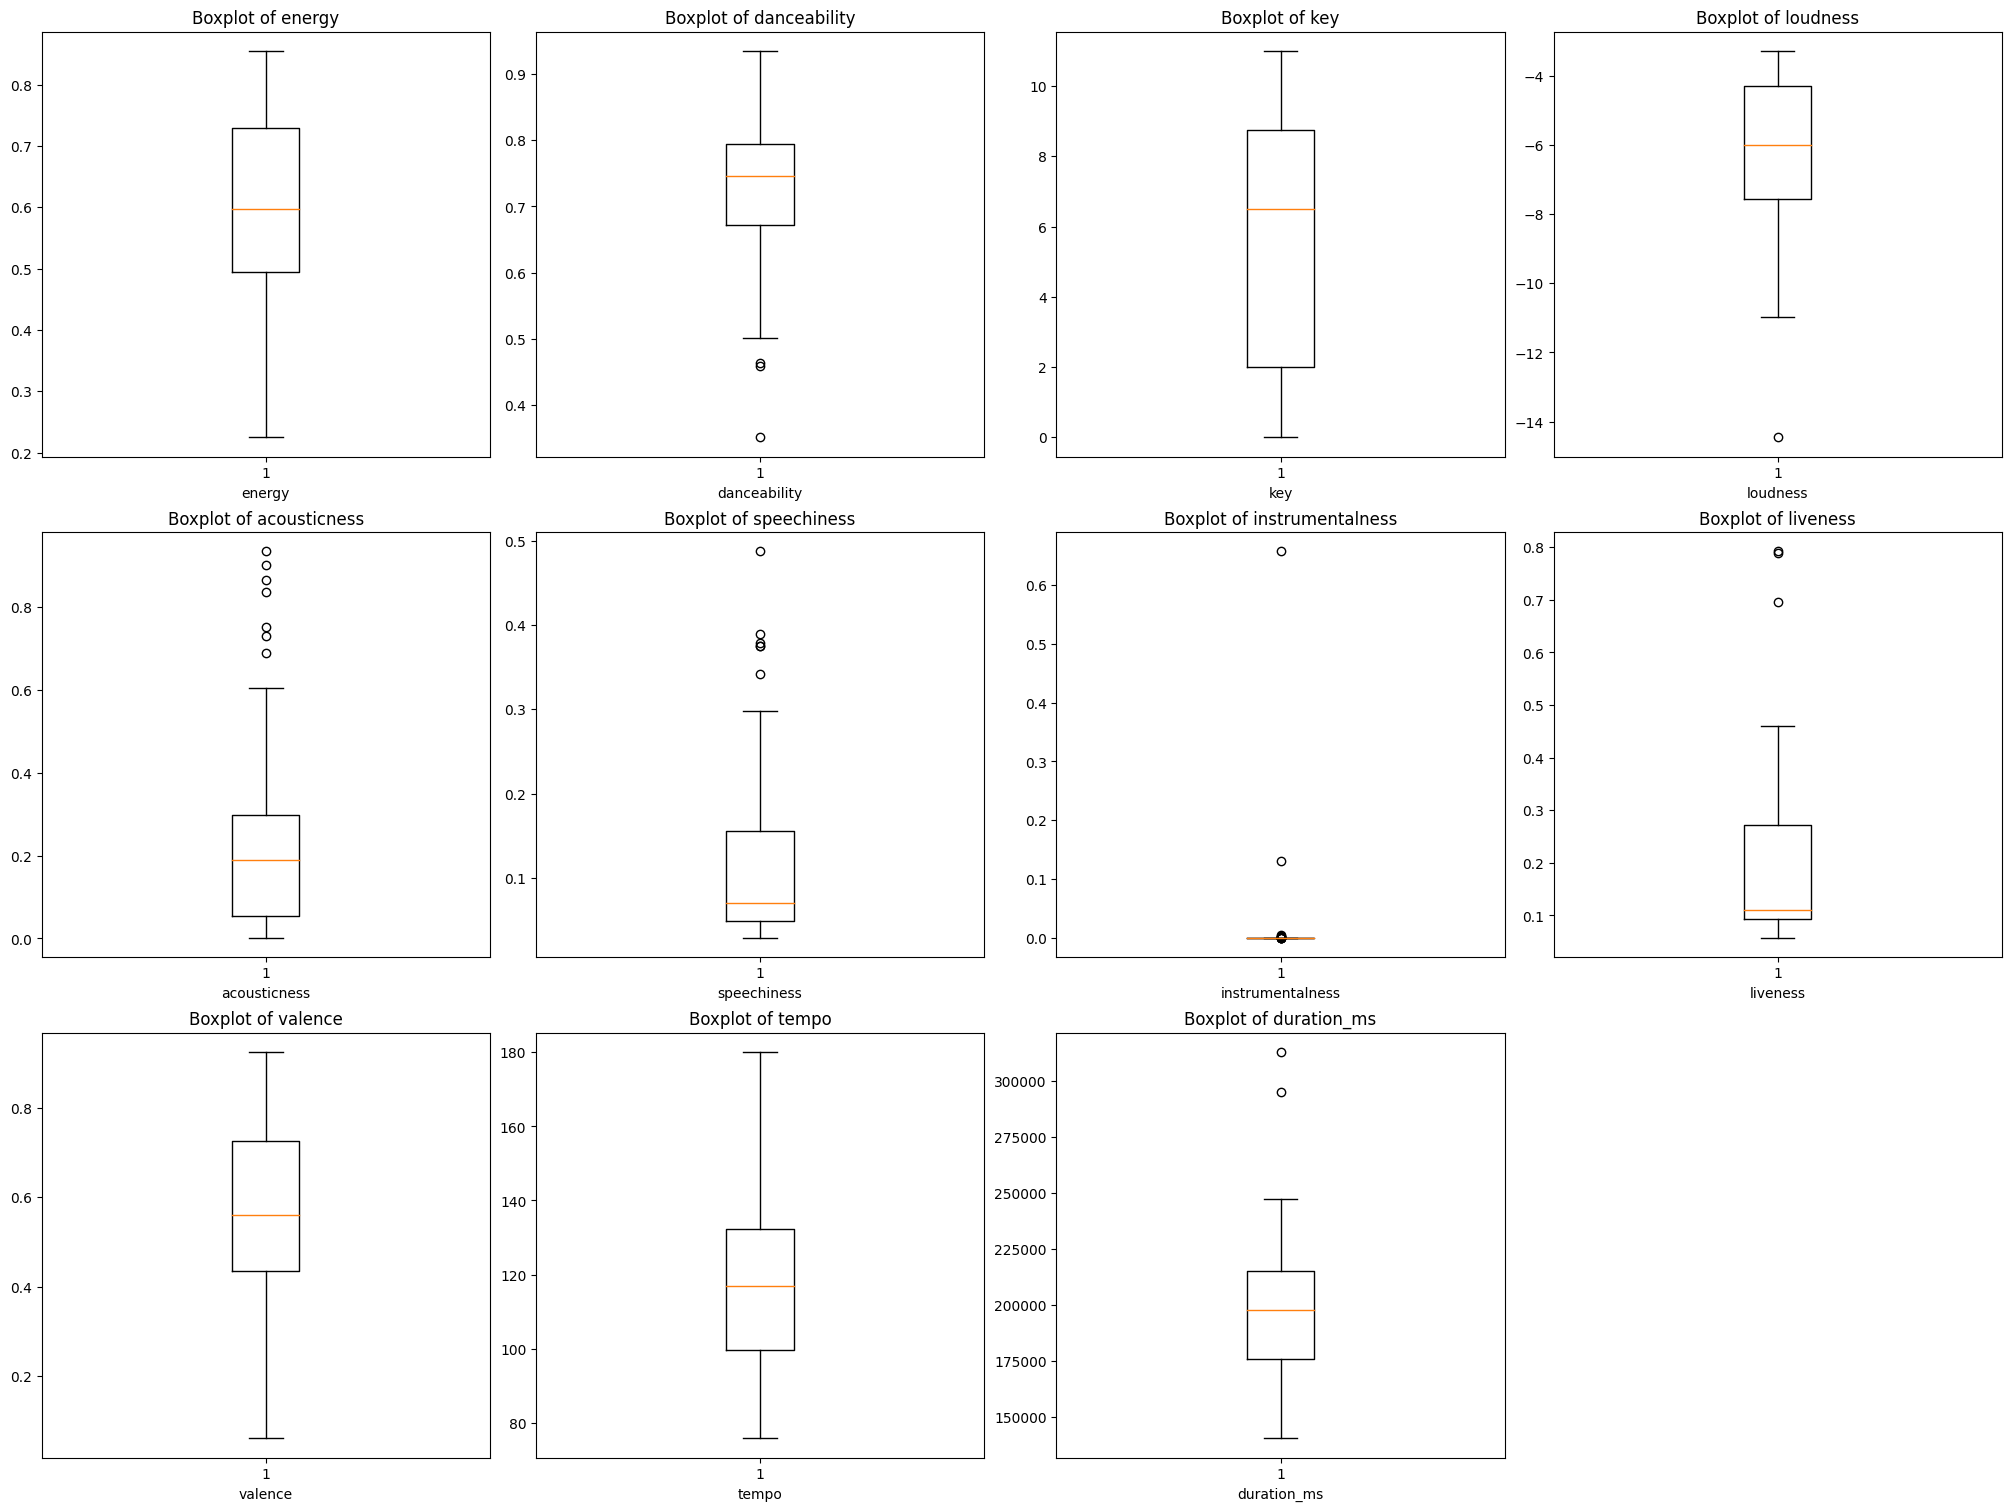

In [6]:
numeric_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

n_cols = (len(numeric_columns) + 2) // 3

fig, axes = plt.subplots(nrows=3, ncols=n_cols, figsize=(5 * n_cols, 15), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.show()

In [7]:
data.columns

Index(['artist', 'album', 'track_name', 'track_id', 'energy', 'danceability',
       'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

Findings: 7 (`'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'duration_ms'`) out of the 11 numerical columns have outliers.

To handle outliers, I will nothing, because that in itself is a way to handle outliers and in this case, they are genuine but extreme values as we are dealing with Spotify's top 50 tracks.
Another reason is, we have just 50 rows of data, can't afford to loose any.

The data looks good now

# 3. Exploratory Data Analysis (EDA)

In [8]:
data.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


### How many observations are there in this dataset?

In [9]:
print(f'This dataset has {data.shape[0]} observations')

This dataset has 50 observations


### How many features this dataset has?


In [10]:
print(f'This dataset has {data.shape[1]} features')

This dataset has 16 features


### Which of the features are categorical?


In [11]:
counter = 1
print('These are the categorical features:')
for col in data.select_dtypes(exclude='number'):
    print(f'{counter}. {col}')
    counter += 1

These are the categorical features:
1. artist
2. album
3. track_name
4. track_id
5. genre


### Which of the features are numeric?

In [12]:
counter = 1
print('These are the numeric features:')
for col in data.select_dtypes(include='number'):
    print(f'{counter}. {col}')
    counter += 1

These are the numeric features:
1. energy
2. danceability
3. key
4. loudness
5. acousticness
6. speechiness
7. instrumentalness
8. liveness
9. valence
10. tempo
11. duration_ms


### Are there any artists that have more than 1 popular track? If yes, which and how many?

In [13]:
artist_count = data.artist.value_counts()
artist_count[artist_count > 1]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64

### Who was the most popular artist?

We can't categorical tell from this data because going by the number of popular tracks, 3 artists have 3 popular tracks (a tie)


In [14]:
artist_count[artist_count == artist_count.max()]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: count, dtype: int64

### How many artists in total have their songs in the top 50?

In [15]:
print(f'{len(data.artist.unique())} artists have their songs on top 50')
data.artist.unique()

40 artists have their songs on top 50


array(['The Weeknd', 'Tones And I', 'Roddy Ricch', 'SAINt JHN',
       'Dua Lipa', 'DaBaby', 'Harry Styles', 'Powfu', 'Trevor Daniel',
       'Lewis Capaldi', 'KAROL G', 'Arizona Zervas', 'Post Malone',
       'Lil Mosey', 'Justin Bieber', 'Drake', 'Doja Cat', 'Maroon 5',
       'Future', 'Jawsh 685', 'Topic', '24kGoldn', 'Billie Eilish',
       'Shawn Mendes', 'Cardi B', 'Surfaces', 'Eminem', 'BTS', 'BENEE',
       'Surf Mesa', 'Lady Gaga', 'Travis Scott', 'Maluma', 'Regard',
       'Black Eyed Peas', 'THE SCOTTS', 'Bad Bunny', 'Juice WRLD',
       'Ariana Grande', 'JP Saxe'], dtype=object)

### Are there any albums that have more than 1 popular track? If yes, which and how many?

In [16]:
album_count = data.album.value_counts()
album_count[album_count > 1]

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64

### How many albums in total have their songs in the top 50?

In [17]:
print(f'{len(data.album.unique())} albums have their songs on top 50')
data.album.unique()

45 albums have their songs on top 50


array(['After Hours', 'Dance Monkey',
       'Please Excuse Me For Being Antisocial', 'Roses (Imanbek Remix)',
       'Future Nostalgia', 'BLAME IT ON BABY', 'Fine Line',
       'death bed (coffee for your head)', 'Nicotine',
       'Divinely Uninspired To A Hellish Extent', 'Tusa', 'ROXANNE',
       "Hollywood's Bleeding", 'Certified Hitmaker', 'Changes',
       'Dark Lane Demo Tapes',
       'Divinely Uninspired To A Hellish Extent (Extended Edition)',
       'Hot Pink', 'Memories', 'High Off Life',
       'Savage Love (Laxed - Siren Beat)', 'Breaking Me',
       'Mood (feat. iann dior)', 'everything i wanted',
       'Shawn Mendes (Deluxe)',
       'WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?',
       'WAP (feat. Megan Thee Stallion)', 'Where the Light Is',
       'Music To Be Murdered By', 'Dynamite (DayTime Version)', 'Hey u x',
       'ily (i love you baby) (feat. Emilee)', 'Chromatica',
       'HIGHEST IN THE ROOM', 'PAPI JUANCHO', 'Ride It',
       'Birds In The Trap Sing McKnight

### Which tracks have a danceability score above 0.7?

In [18]:
high_danceables = data.loc[data.danceability > 0.7]
high_danceables[['track_name', 'genre','danceability']]


,track_name,genre,danceability
1,Dance Monkey,Alternative/Indie,0.825
2,The Box,Hip-Hop/Rap,0.896
3,Roses - Imanbek Remix,Dance/Electronic,0.785
4,Don't Start Now,Nu-disco,0.793
5,ROCKSTAR (feat. Roddy Ricch),Hip-Hop/Rap,0.746
7,death bed (coffee for your head),Hip-Hop/Rap,0.726
8,Falling,R&B/Hip-Hop alternative,0.784
10,Tusa,Pop,0.803
13,Blueberry Faygo,Hip-Hop/Rap,0.774
14,Intentions (feat. Quavo),Pop,0.806


### Which tracks have a danceability score below 0.4?


In [19]:
low_danceables = data.loc[data.danceability < 0.4]
low_danceables[['track_name', 'genre', 'danceability']]

,track_name,genre,danceability
44,lovely (with Khalid),Chamber pop,0.351


### Which tracks have their loudness above -5?


In [20]:
high_loudnes = data.loc[data.loudness > -5]
high_loudnes[['track_name', 'genre', 'loudness']]

,track_name,genre,loudness
4,Don't Start Now,Nu-disco,-4.521
6,Watermelon Sugar,Pop,-4.209
10,Tusa,Pop,-3.280
12,Circles,Pop/Soft Rock,-3.497
16,Before You Go,Alternative/Indie,-4.858
17,Say So,R&B/Soul,-4.577
21,Adore You,Pop,-3.675
23,Mood (feat. iann dior),Pop rap,-3.558
31,Break My Heart,Dance-pop/Disco,-3.434
32,Dynamite,Disco-pop,-4.410


### Which tracks have their loudness below -8?

In [21]:
low_loudnes = data.loc[data.loudness < -8]
low_loudnes[['track_name', 'genre', 'loudness']]

,track_name,genre,loudness
7,death bed (coffee for your head),Hip-Hop/Rap,-8.765
8,Falling,R&B/Hip-Hop alternative,-8.756
15,Toosie Slide,Hip-Hop/Rap,-8.820
20,Savage Love (Laxed - Siren Beat),Hip-Hop/Rap,-8.520
24,everything i wanted,Pop,-14.454
26,bad guy,Electro-pop,-10.965
36,HIGHEST IN THE ROOM,Hip-Hop/Rap,-8.764
44,lovely (with Khalid),Chamber pop,-10.109
47,If the World Was Ending - feat. Julia Michaels,Pop,-10.086


### Which track is the longest?

In [22]:
longest_tracks = data.loc[data.duration_ms == data.duration_ms.max()]

longest_tracks[['track_name', 'duration_ms']]

,track_name,duration_ms
49,SICKO MODE,312820


### Which track is the shortest?

In [23]:
shortest_tracks = data.loc[data.duration_ms == data.duration_ms.min()]

shortest_tracks[['track_name', 'duration_ms']]

,track_name,duration_ms
23,Mood (feat. iann dior),140526


### Which genre is the most popular?


In [24]:
genre_count = data.genre.value_counts()
genre_count.idxmax()

'Pop'

In [25]:
track_genre = data.genre.str.split("/")
track_genre.explode('genre').value_counts()

genre
Hip-Hop                15
Pop                    15
Rap                    13
Alternative             5
Dance                   5
Electronic              5
R&B                     4
Indie                   4
Soul                    2
 Electro-pop            2
Disco                   1
experimental            1
reggaeton               1
Dreampop                1
Disco-pop               1
Soft Rock               1
Dance-pop               1
Trap                    1
Pop rap                 1
Hip-Hop alternative     1
Nu-disco                1
Chamber pop             1
Name: count, dtype: int64

### Which genres have just one song on the top 50?

In [26]:
genre_count[genre_count == 1]

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

### How many genres in total are represented in the top 50?

In [27]:
print(f'There are {len(data.genre.unique())} genres represented in the top 50')
data.genre.unique()

There are 16 genres represented in the top 50


array(['R&B/Soul', 'Alternative/Indie', 'Hip-Hop/Rap', 'Dance/Electronic',
       'Nu-disco', 'Pop', 'R&B/Hip-Hop alternative', 'Pop/Soft Rock',
       'Pop rap', ' Electro-pop', 'Hip-Hop/Trap', 'Dance-pop/Disco',
       'Disco-pop', 'Dreampop/Hip-Hop/R&B',
       'Alternative/reggaeton/experimental', 'Chamber pop'], dtype=object)

### Which features are strongly positively correlated?


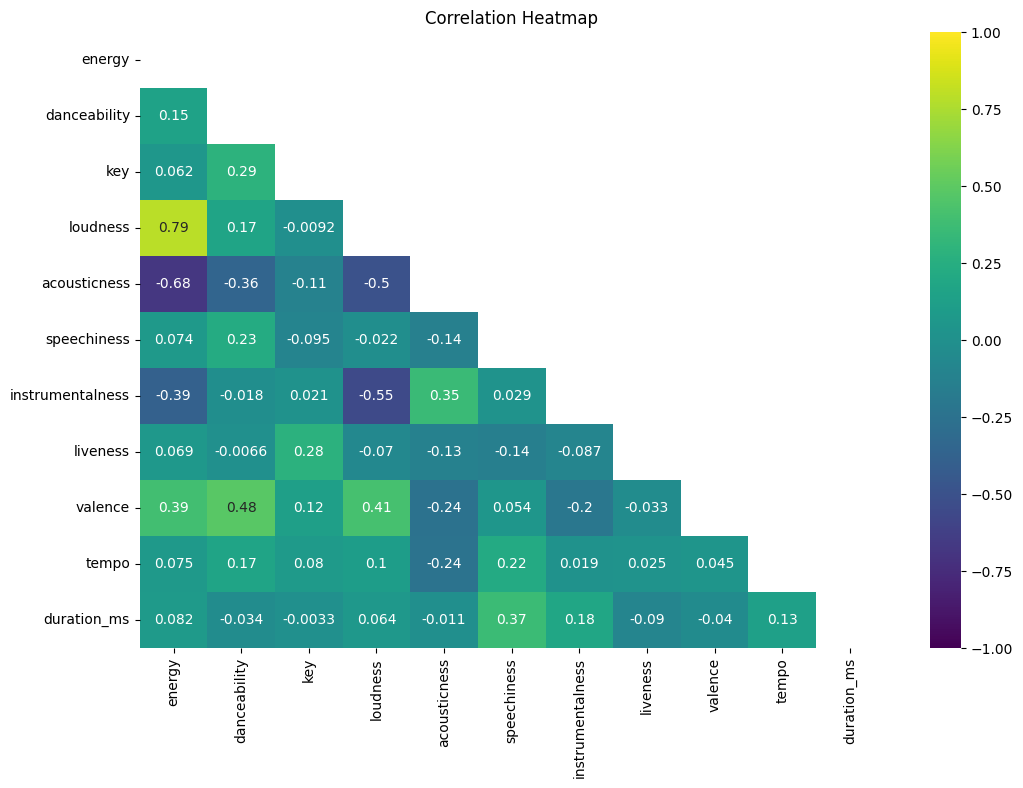

In [28]:
import numpy as np
corr_data = data.select_dtypes(include='number')

corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask = np.triu(corr_matrix), annot=True, cmap="viridis", vmax=1.0, vmin=-1.0)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
strong_positive_threshold = 0.7


strong_positive_corr = corr_matrix[(corr_matrix >= strong_positive_threshold) & (corr_matrix < 1)]
positive_corr_pairs = strong_positive_corr.stack().index.tolist()

In [30]:
positive_corr_pairs

[('energy', 'loudness'), ('loudness', 'energy')]

### Which features are strongly negatively correlated?


In [31]:
strong_negative_threshold = -0.7

strong_negative_corr = corr_matrix[(corr_matrix <= strong_negative_threshold) & (corr_matrix > -1)]
negative_corr_pairs = strong_negative_corr.stack().index.tolist()

In [32]:
negative_corr_pairs

[]

### Which features are not correlated?

In [33]:
uncorrelated_features = corr_matrix[(corr_matrix == 0.0)]
uncorrelated_pairs = uncorrelated_features.stack().index.tolist()

print(uncorrelated_pairs)

[]


### How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [34]:

genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

genre_df = data[data.genre.isin(genres)]

mean_genre_df = genre_df.groupby('genre')[['danceability', 'loudness', 'acousticness']].median()

mean_genre_df


,danceability,loudness,acousticness
genre,,,
Alternative/Indie,0.663,-5.2685,0.6460
Dance/Electronic,0.785,-5.4570,0.0686
Hip-Hop/Rap,0.774,-7.6480,0.1450
Pop,0.690,-6.6445,0.2590


In [35]:
mean_genre_df.index

Index(['Alternative/Indie', 'Dance/Electronic', 'Hip-Hop/Rap', 'Pop'], dtype='object', name='genre')

In [36]:
def create_plot(data, metric, category):
    plt.figure(figsize=(10, 6))
    plt.bar(x = data.index, height=data[metric], color='skyblue') 
    plt.title(f'{metric} Score Comparison by {category}')
    plt.ylabel(f'{metric} Score')
    plt.xlabel(f'{category}')
    plt.xticks(rotation=45)
    plt.show()

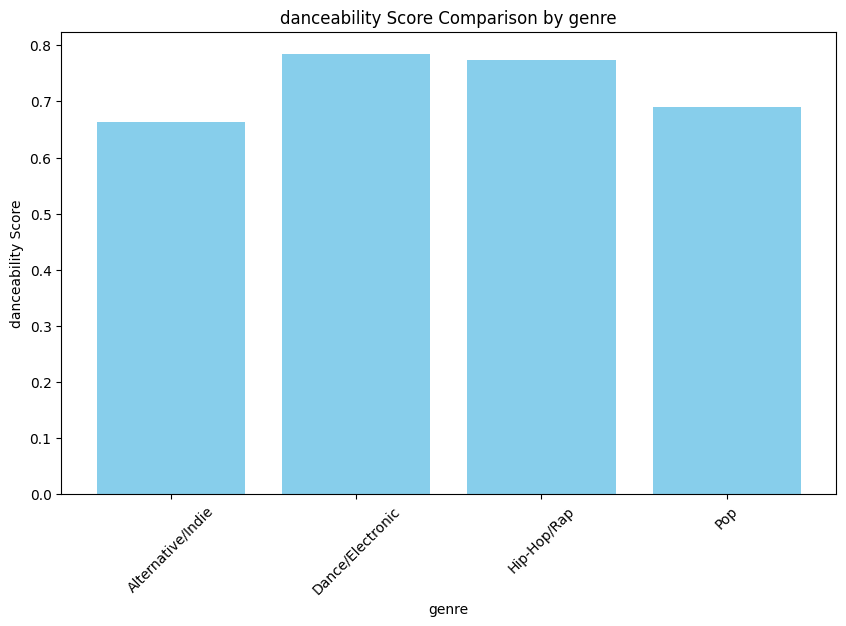

In [37]:
create_plot(mean_genre_df, 'danceability', 'genre')

We see here that the `Dance/Electronic` genre has the highest median danceability closely followed by `Hip-Hop/Rap` genre. This goes a long way to tell us about the nature of these kinds of music. The `Alternative/Indie` genre has the least meadian danceability showing that tracks in this genre are least danceable.

***
### How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

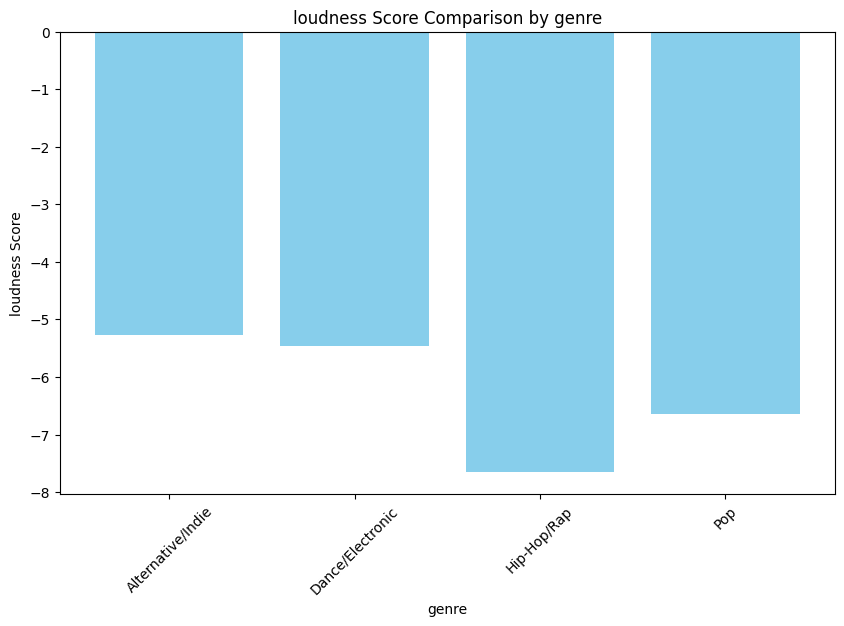

In [38]:

create_plot(mean_genre_df, 'loudness', 'genre')

From the plot above, the `Hip-Hop/Rap` genre is the least in terms of loudness based on the median value, followed by the `Pop` genre. The `Alternative/Indie` genre is the loudest genre
***
### How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

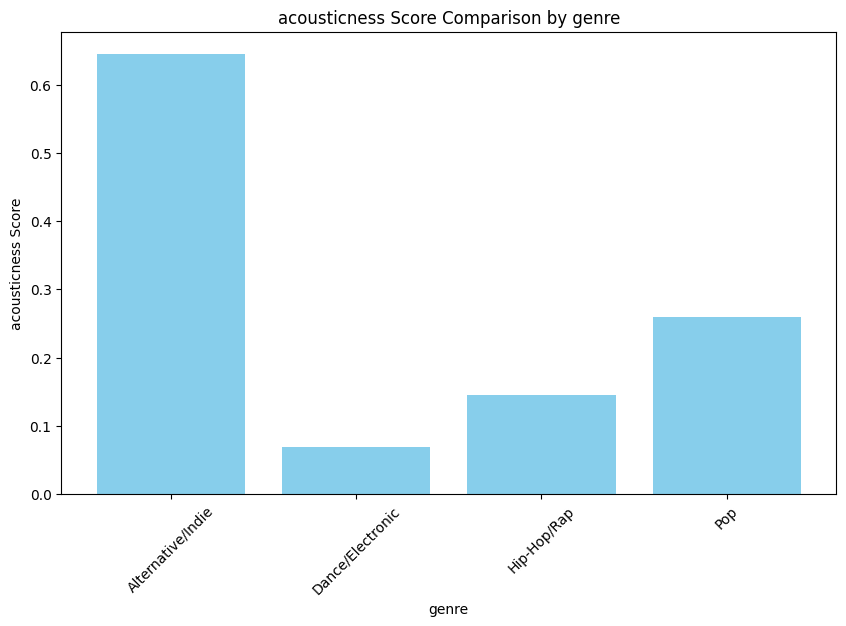

In [39]:
create_plot(mean_genre_df, 'acousticness', 'genre')

The `Alternative/Indie` genre has the highest acousticness and in reality this is actually true because most of the music in this genre a produced with non-electric instrument. The `Dance/Electric` genre has the least acousticness because most of the sounds in this type music are produced with electronic instruments.

***
# Findings

From this analysis, we can conclude that factors in this order: `loudness`, `acousticness`, `eneregy` and `danceability` respectively, influence the popularity of a song. From the analysis we discovered that Artists and Genre that feature high loudness and acousticness appear to be more popular, a typical example is the `Alternative/Indie` genre.


# Improvements
More data is reuired to carry out a more detailed analysis and to drill down and perform more granular analysis.



